# Challenge : Menyelesaikan Permasalahan Perusahaan Telecom

- Nama: ERIKA BUDIARTI
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

### Menyiapkan data yang akan digunakan

In [3]:
churn_df = pd.read_csv("/content/churn.csv")

## Data Understanding

Menampilkan 5 baris pertama dari dataframe

In [4]:
churn_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Menampilkan jumlah baris dan kolom dataframe

In [5]:
churn_df.shape

(4250, 20)

Menampilkan tipe data dari variabel dataframe

In [6]:
churn_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

Menampilkan statistik deskriptif dari dataframe

In [7]:
churn_df.describe(include='object')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [8]:
churn_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Menampilkan jumlah data duplikat dari dataframe

In [9]:
churn_df.duplicated().sum()

0

Menampilkan missing value dari dataframe

In [10]:
churn_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Data Preparation / Preprocessing

### Exploratory Data Analysis

Menampilkan nilai unik dari kolom "churn"

In [11]:
churn_df['churn'].value_counts()

churn
no     3652
yes     598
Name: count, dtype: int64

Menampilkan distribusi kolom "churn" dalam bentuk pie chart

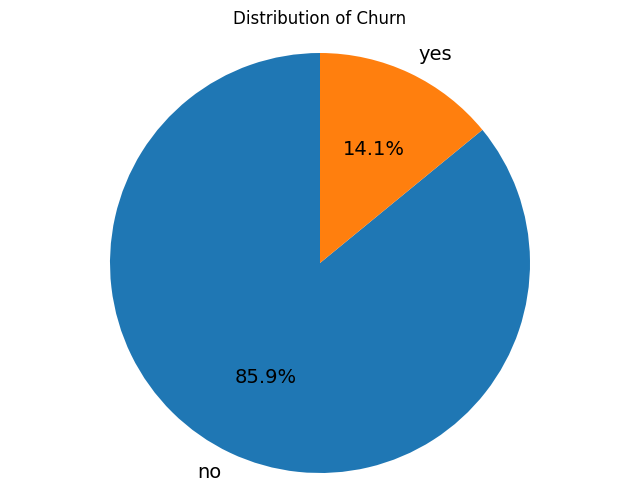

In [12]:
churn_counts = churn_df['churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribution of Churn')
plt.axis('equal')
plt.show()

Mengubah nilai dalam kolom 'churn'

In [13]:
churn_df['churn']=churn_df['churn'].map({'no':0,
                                         'yes':1
})

Mengubah nilai dalam kolom 'area_code'

In [14]:
# Map area codes to numerical values
churn_df['area_code'] = churn_df['area_code'].map({'area_code_415': '415',
                                                   'area_code_408': '408',
                                                   'area_code_510': '510'})

Menampilkan korelasi antar variabel dalam bentuk heatmap

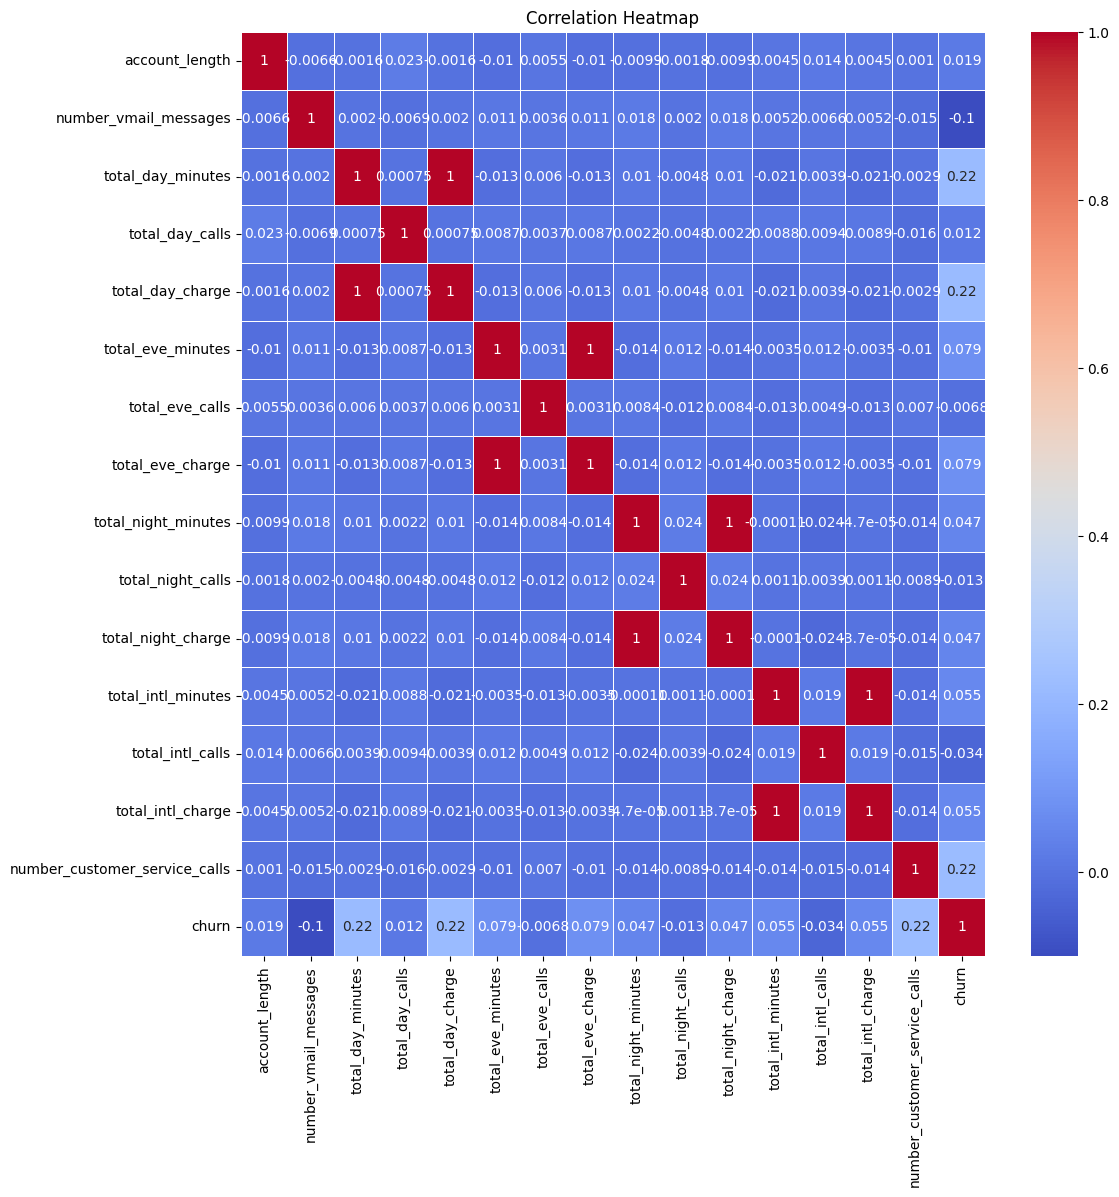

In [15]:
# Drop non-numeric variables
variables_to_drop = ['state', 'international_plan', 'voice_mail_plan', 'area_code']
churn_num_df = churn_df.drop(variables_to_drop, axis=1)

plt.figure(figsize=(12, 12))
sns.heatmap(churn_num_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Univariate Visualization

array([[<Axes: title={'center': 'total_day_minutes'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_day_calls'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_day_charge'}, ylabel='Frequency'>],
       [<Axes: title={'center': 'total_night_minutes'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_night_calls'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_night_charge'}, ylabel='Frequency'>],
       [<Axes: title={'center': 'total_eve_minutes'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_eve_calls'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_eve_charge'}, ylabel='Frequency'>],
       [<Axes: title={'center': 'total_intl_minutes'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_intl_calls'}, ylabel='Frequency'>,
        <Axes: title={'center': 'total_intl_charge'}, ylabel='Frequency'>]],
      dtype=object)

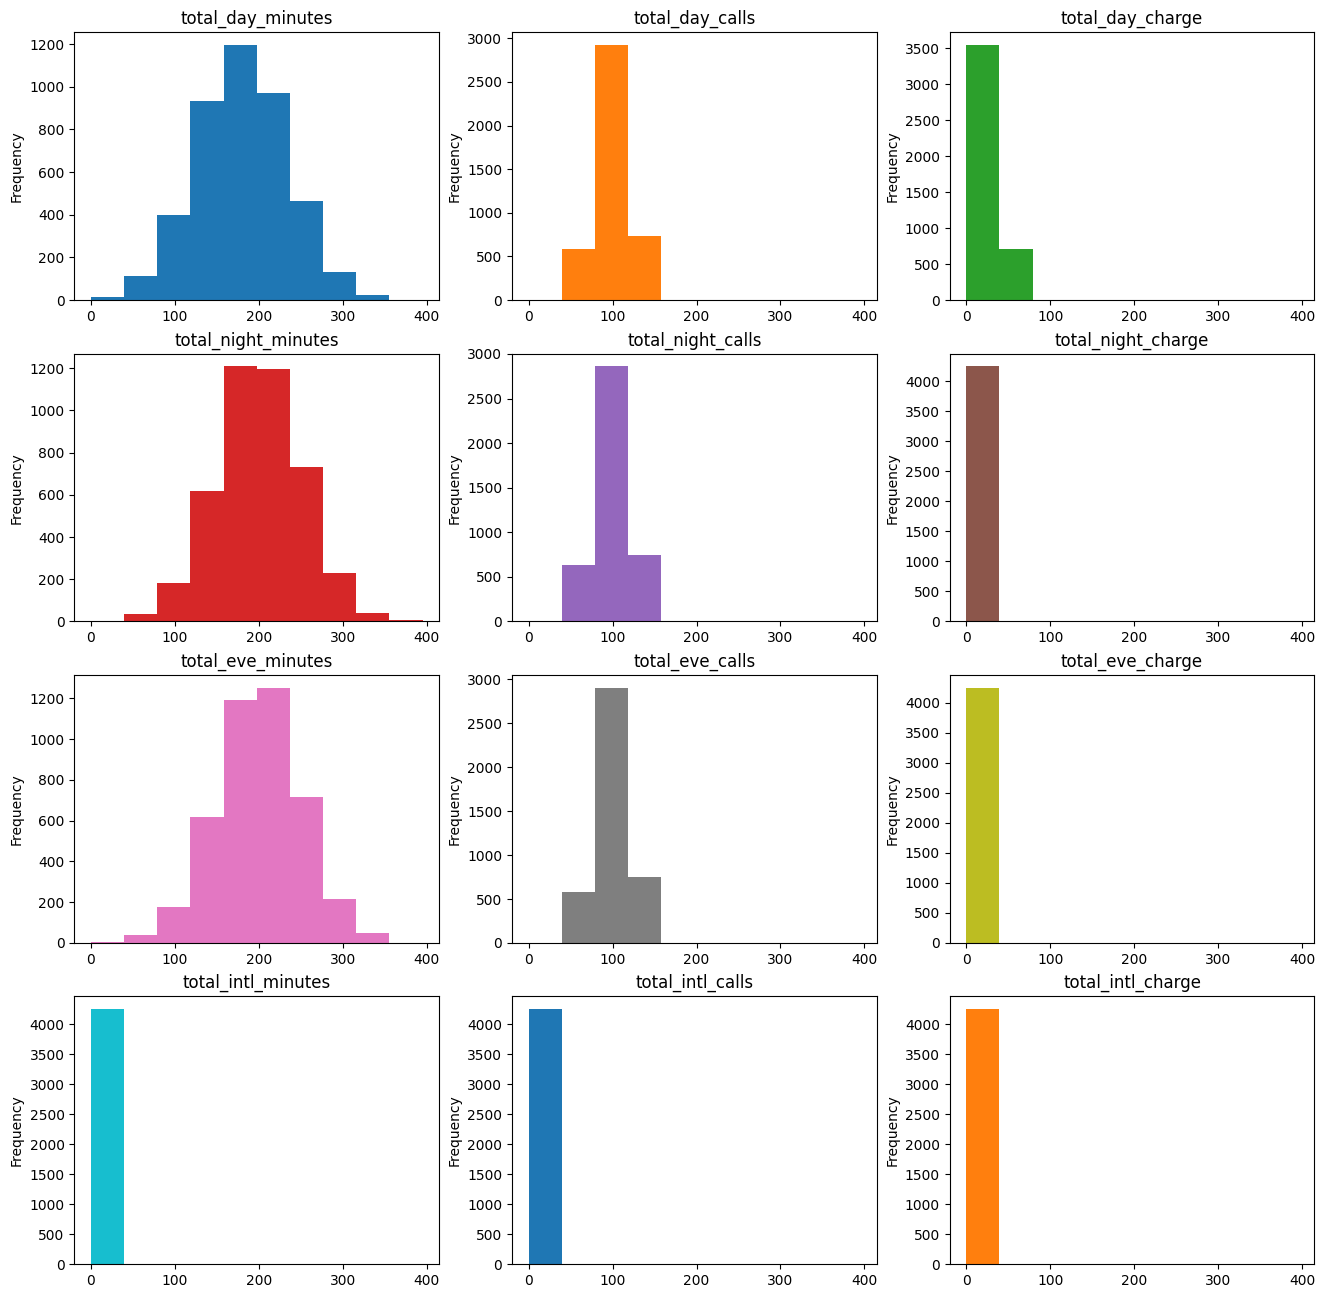

In [16]:
features = ['total_day_minutes', 'total_day_calls', 'total_day_charge',
            'total_night_minutes', 'total_night_calls', 'total_night_charge',
            'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
            'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']

churn_num_df[features].plot(kind="hist",
                            subplots=True,
                            layout=(4, 3),
                            sharex=False,
                            figsize=(16, 16),
                            title=features,
                            legend=False)

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

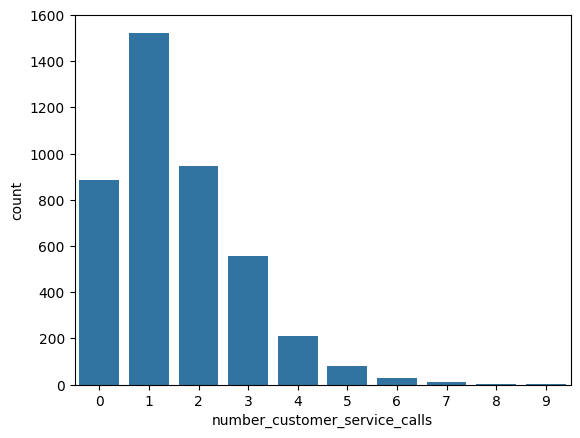

In [17]:
sns.countplot(x='number_customer_service_calls', data=churn_num_df)

### Multivariate Visualization

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

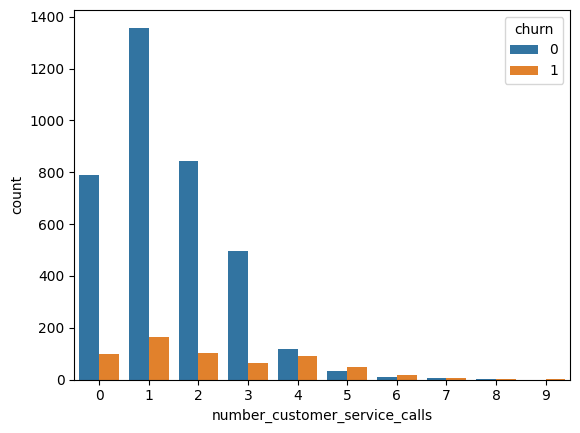

In [18]:
sns.countplot(x="number_customer_service_calls", hue="churn", data=churn_num_df)

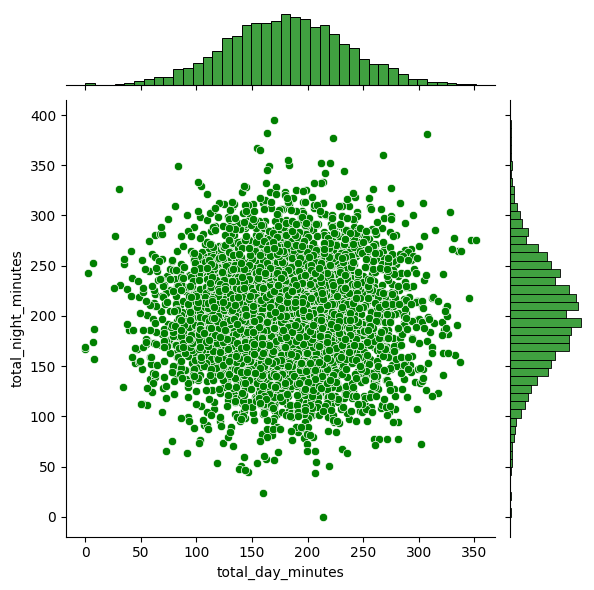

In [19]:
sns.jointplot(x='total_day_minutes', y='total_night_minutes', data=churn_num_df, kind='scatter', color='g')

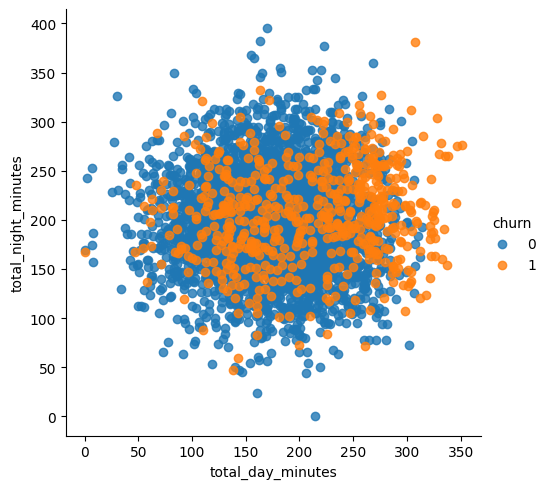

In [20]:
sns.lmplot(x='total_day_minutes', y='total_night_minutes', data=churn_num_df, hue='churn', fit_reg=False)

## Modeling

In [21]:
category_cols = churn_df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,state,area_code,international_plan,voice_mail_plan
0,OH,415,no,yes
1,NJ,415,no,no
2,OH,408,yes,no
3,OK,415,yes,no
4,MA,510,no,yes


Persiapan pembuatan direktori "model"

In [22]:
import os
os.makedirs("models")

Melakukan Label Encoding variable kategorial

In [23]:
def save_encoders(features, encoder):
    for feature in features:
        joblib.dump(encoder, "models/encoder_{}.joblib".format(feature))

features_to_encode = ['state',
                     'area_code',
                     'international_plan',
                     'voice_mail_plan']

label_encoder = LabelEncoder()

# Label encode columns and save encoders
for column in features_to_encode:
    churn_df[column] = label_encoder.fit_transform(churn_df[column])

save_encoders(features_to_encode, label_encoder)

Melakukan Scaling variable numerik

In [24]:
def save_scalers(features, scaler):
    for feature in features:
        joblib.dump(scaler, "models/scaler_{}.joblib".format(feature))

features_to_scale = ['total_day_minutes',
                     'total_day_calls',
                     'total_day_charge',
                     'total_night_minutes',
                     'total_night_calls',
                     'total_night_charge',
                     'total_eve_minutes',
                     'total_eve_calls',
                     'total_eve_charge',
                     'total_intl_minutes',
                     'total_intl_calls',
                     'total_intl_charge',
                     'account_length',
                     'number_vmail_messages',
                     'number_customer_service_calls']

scaler = StandardScaler()

# Fit scaler to columns and save scalers
for column in features_to_scale:
    scaled_feature = scaler.fit_transform(churn_df[[column]])
    scaled_feature = scaled_feature.reshape(-1, 1)  # Reshape the scaled feature
    churn_df[column] = scaled_feature
    save_scalers([column], scaler)

Split dataset 70:30

In [25]:
X=np.array(churn_df.drop(['churn'],axis=1))
y=np.array(churn_df['churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(2975, 19)
(1275, 19)


Encoding untuk variable target

In [26]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
joblib.dump(encoder, "models/encoder_target.joblib")

y_test = encoder.transform(y_test)

### Model Logistic Regression

In [27]:
# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression()

# Define the grid of hyperparameters
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 250, 500, 750, 1000],
    'multi_class': ['auto'],
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_lr_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_lr_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistic Regression is", test_accuracy)

Best parameters: {'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 0.0001}
The test accuracy score of Logistic Regression is 0.8627450980392157


### Model Decision Tree

In [31]:
# Initialize the Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_dt_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_dt_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_dt_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree Classifier is", test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.9388235294117647


### Model Random Forest

In [35]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_rf_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_rf_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_rf_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Classifier is", test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 400}
The test accuracy score of Random Forest Classifier is 0.956078431372549


### Model Gradient Boosting

In [39]:
# Initialize the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_gb,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_gb_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_gb_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_gb_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Classifier is", test_accuracy)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
The test accuracy score of Gradient Boosting Classifier is 0.9607843137254902


## Evaluation

### Logistic Regression

In [28]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Logistric Regression:")
print(lr_cm)

Confusion Matrix of Logistric Regression:
[[1060   20]
 [ 155   40]]


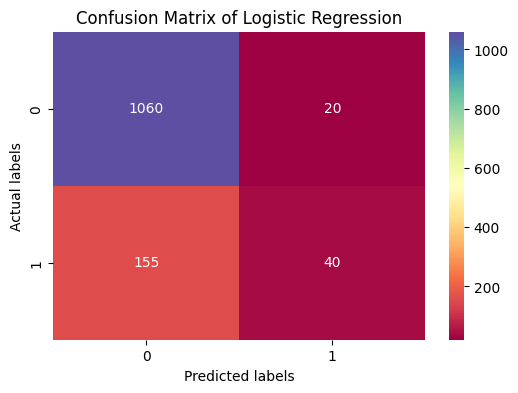

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [30]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1080
           1       0.67      0.21      0.31       195

    accuracy                           0.86      1275
   macro avg       0.77      0.59      0.62      1275
weighted avg       0.84      0.86      0.83      1275



### Decision Tree

In [32]:
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Decision Tree Classifier:")
print(dt_cm)

Confusion Matrix of Decision Tree Classifier:
[[1056   24]
 [  54  141]]


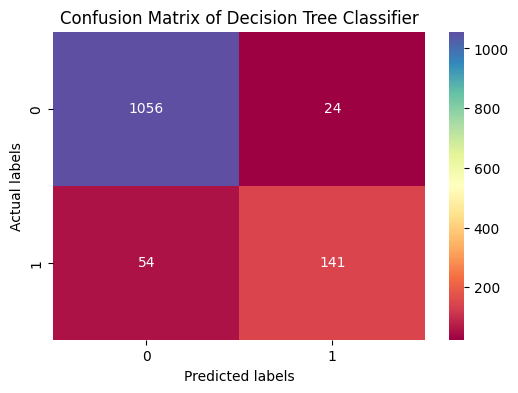

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

In [34]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1080
           1       0.85      0.72      0.78       195

    accuracy                           0.94      1275
   macro avg       0.90      0.85      0.87      1275
weighted avg       0.94      0.94      0.94      1275



### Random Forest

In [36]:
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)

Confusion Matrix of Random Forest Classifier:
[[1071    9]
 [  47  148]]


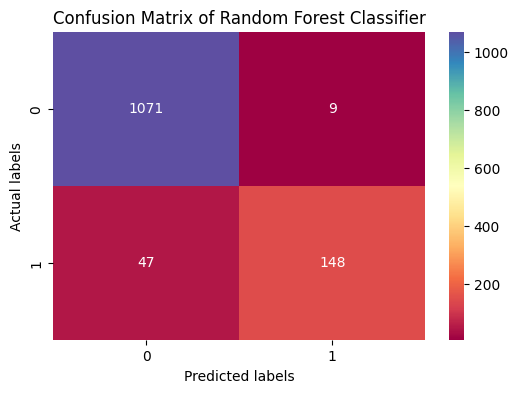

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [38]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1080
           1       0.94      0.76      0.84       195

    accuracy                           0.96      1275
   macro avg       0.95      0.88      0.91      1275
weighted avg       0.96      0.96      0.95      1275



### Gradient Boosting

In [40]:
gb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Gradient Boosting Classifier:")
print(gb_cm)

Confusion Matrix of Gradient Boosting Classifier:
[[1067   13]
 [  37  158]]


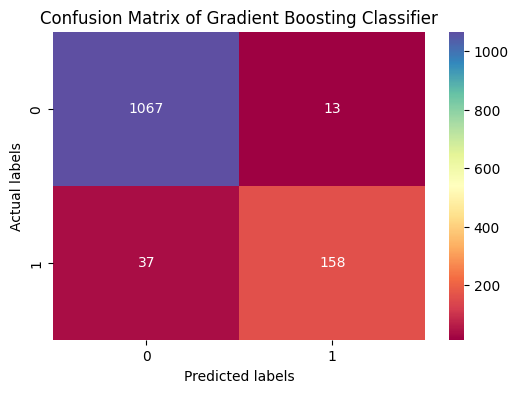

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

In [42]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1080
           1       0.92      0.81      0.86       195

    accuracy                           0.96      1275
   macro avg       0.95      0.90      0.92      1275
weighted avg       0.96      0.96      0.96      1275



## Deployment

Save model Gradient Boosting

In [43]:
joblib.dump(clf_gb_grid, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']